In [1]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.preprocessing import OneHotEncoder

### Data Read and using functions

In [2]:
df = pd.read_csv('https://github.com/Ayushk543-ace/Dataset/raw/main/Drug_Consumption.csv')
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1884 non-null   int64  
 1   Age        1884 non-null   object 
 2   Gender     1884 non-null   object 
 3   Education  1884 non-null   object 
 4   Country    1884 non-null   object 
 5   Ethnicity  1884 non-null   object 
 6   Nscore     1884 non-null   float64
 7   Escore     1884 non-null   float64
 8   Oscore     1884 non-null   float64
 9   AScore     1884 non-null   float64
 10  Cscore     1884 non-null   float64
 11  Impulsive  1884 non-null   float64
 12  SS         1884 non-null   float64
 13  Alcohol    1884 non-null   object 
 14  Amphet     1884 non-null   object 
 15  Amyl       1884 non-null   object 
 16  Benzos     1884 non-null   object 
 17  Caff       1884 non-null   object 
 18  Cannabis   1884 non-null   object 
 19  Choc       1884 non-null   object 
 20  Coke    

In [4]:
df.Age.unique()

array(['25-34', '35-44', '18-24', '65+', '45-54', '55-64'], dtype=object)

In [5]:
df['Age']=df['Age'].astype('category')

In [6]:
df['New_Age']=df['Age'].cat.codes

In [7]:
df.New_Age

0       1
1       2
2       0
3       2
4       5
       ..
1879    0
1880    0
1881    1
1882    0
1883    0
Name: New_Age, Length: 1884, dtype: int8

###Droping unwanted columns

In [8]:
df.drop(['Age'],inplace=True,axis=1)

In [9]:
df.drop(['Education'],inplace=True,axis=1)

In [10]:
df.drop(['Ethnicity'],inplace=True,axis=1)

In [11]:
df.drop(['VSA'],inplace=True,axis=1)

In [12]:
df.drop(['Semer'],inplace=True,axis=1)

In [13]:
df.drop(['Nicotine'],inplace=True,axis=1)

In [14]:
df.drop(['Mushrooms'],inplace=True,axis=1)

In [15]:
df.drop(['Meth'],inplace=True,axis=1)

In [16]:
df.drop(['Ecstasy'],inplace=True,axis=1)

### covert objects into int 

In [17]:
df['Gender']=df['Gender'].astype('category')
df['New_Gender']=df['Gender'].cat.codes
df.New_Gender

0       1
1       1
2       0
3       0
4       0
       ..
1879    0
1880    1
1881    0
1882    0
1883    1
Name: New_Gender, Length: 1884, dtype: int8

In [18]:
df.drop(['Gender'],inplace=True,axis=1)

In [19]:
df['Country']=df['Country'].astype('category')
df['New_Country']=df['Country'].cat.codes
df.New_Country 

0       5
1       5
2       5
3       5
4       1
       ..
1879    6
1880    6
1881    6
1882    6
1883    4
Name: New_Country, Length: 1884, dtype: int8

In [20]:
df.drop(['Country'],inplace=True,axis=1)

In [21]:
df['Alcohol']=df['Alcohol'].astype('category')
df['New_Alcohol']=df['Alcohol'].cat.codes
df.New_Alcohol

0       5
1       6
2       4
3       4
4       2
       ..
1879    5
1880    5
1881    4
1882    5
1883    4
Name: New_Alcohol, Length: 1884, dtype: int8

In [22]:
df.drop(['Alcohol'],inplace=True,axis=1)

In [23]:
df['Amphet']=df['Amphet'].astype('category')
df['New_Amphet']=df['Amphet'].cat.codes
df.New_Amphet

0       2
1       0
2       0
3       1
4       0
       ..
1879    0
1880    0
1881    6
1882    0
1883    3
Name: New_Amphet, Length: 1884, dtype: int8

In [24]:
df.drop(['Amphet'],inplace=True,axis=1)

In [25]:
df['Amyl']=df['Amyl'].astype('category')
df['New_Amyl']=df['Amyl'].cat.codes
df.New_Amyl

0       2
1       0
2       0
3       1
4       0
       ..
1879    0
1880    0
1881    5
1882    0
1883    0
Name: New_Amyl, Length: 1884, dtype: int8

In [26]:
df.drop(['Amyl'],inplace=True,axis=1)

In [27]:
df['Benzos']=df['Benzos'].astype('category')
df['New_Benzos']=df['Benzos'].cat.codes
df.New_Benzos

0       0
1       0
2       3
3       0
4       0
       ..
1879    0
1880    0
1881    5
1882    0
1883    3
Name: New_Benzos, Length: 1884, dtype: int8

In [28]:
df.drop(['Benzos'],inplace=True,axis=1)

In [29]:
df['Caff']=df['Caff'].astype('category')
df['New_Caff']=df['Caff'].cat.codes
df.New_Caff 

0       6
1       6
2       5
3       6
4       6
       ..
1879    4
1880    5
1881    6
1882    6
1883    6
Name: New_Caff, Length: 1884, dtype: int8

In [30]:
df.drop(['Caff'],inplace=True,axis=1)

In [31]:
df['Cannabis']=df['Cannabis'].astype('category')
df['New_Cannabis']=df['Cannabis'].cat.codes
df.New_Cannabis

0       4
1       3
2       2
3       3
4       0
       ..
1879    5
1880    3
1881    6
1882    6
1883    3
Name: New_Cannabis, Length: 1884, dtype: int8

In [32]:
df.drop(['Cannabis'],inplace=True,axis=1)

In [33]:
df['Choc']=df['Choc'].astype('category')
df['New_Choc']=df['Choc'].cat.codes
df.New_Choc

0       6
1       4
2       4
3       6
4       4
       ..
1879    4
1880    4
1881    6
1882    5
1883    6
Name: New_Choc, Length: 1884, dtype: int8

In [34]:
df.drop(['Choc'],inplace=True,axis=1)

In [35]:
df['Coke']=df['Coke'].astype('category')
df['New_Coke']=df['Coke'].cat.codes
df.New_Coke

0       3
1       0
2       2
3       0
4       0
       ..
1879    0
1880    0
1881    4
1882    0
1883    3
Name: New_Coke, Length: 1884, dtype: int8

In [36]:
df.drop(['Coke'],inplace=True,axis=1)

In [37]:
df['Crack']=df['Crack'].astype('category')
df['New_Crack']=df['Crack'].cat.codes
df.New_Crack

0       0
1       0
2       0
3       0
4       0
       ..
1879    0
1880    0
1881    0
1882    0
1883    0
Name: New_Crack, Length: 1884, dtype: int8

In [38]:
df.drop(['Crack'],inplace=True,axis=1)

In [39]:
df['Heroin']=df['Heroin'].astype('category')
df['New_Heroin']=df['Heroin'].cat.codes
df.New_Heroin

0       0
1       0
2       0
3       0
4       0
       ..
1879    0
1880    0
1881    0
1882    0
1883    0
Name: New_Heroin, Length: 1884, dtype: int8

In [40]:
df.drop(['Heroin'],inplace=True,axis=1)

In [41]:
df['Ketamine']=df['Ketamine'].astype('category')
df['New_Ketamine']=df['Ketamine'].cat.codes
df.New_Ketamine

0       2
1       0
2       2
3       0
4       0
       ..
1879    0
1880    0
1881    2
1882    0
1883    0
Name: New_Ketamine, Length: 1884, dtype: int8

In [42]:
df.drop(['Ketamine'],inplace=True,axis=1)

In [43]:
df['Legalh']=df['Legalh'].astype('category')
df['New_Legalh']=df['Legalh'].cat.codes
df.New_Legalh

0       0
1       0
2       0
3       1
4       0
       ..
1879    3
1880    3
1881    0
1882    3
1883    3
Name: New_Legalh, Length: 1884, dtype: int8

In [44]:
df.drop(['Legalh'],inplace=True,axis=1)

In [45]:
df['LSD']=df['LSD'].astype('category')
df['New_LSD']=df['LSD'].cat.codes
df.New_LSD

0       2
1       0
2       0
3       0
4       0
       ..
1879    3
1880    5
1881    2
1882    3
1883    3
Name: New_LSD, Length: 1884, dtype: int8

In [46]:
df.drop(['LSD'],inplace=True,axis=1)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1884 non-null   int64  
 1   Nscore        1884 non-null   float64
 2   Escore        1884 non-null   float64
 3   Oscore        1884 non-null   float64
 4   AScore        1884 non-null   float64
 5   Cscore        1884 non-null   float64
 6   Impulsive     1884 non-null   float64
 7   SS            1884 non-null   float64
 8   New_Age       1884 non-null   int8   
 9   New_Gender    1884 non-null   int8   
 10  New_Country   1884 non-null   int8   
 11  New_Alcohol   1884 non-null   int8   
 12  New_Amphet    1884 non-null   int8   
 13  New_Amyl      1884 non-null   int8   
 14  New_Benzos    1884 non-null   int8   
 15  New_Caff      1884 non-null   int8   
 16  New_Cannabis  1884 non-null   int8   
 17  New_Choc      1884 non-null   int8   
 18  New_Coke      1884 non-null 

In [48]:
df.head()

,ID,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,New_Age,New_Gender,...,New_Benzos,New_Caff,New_Cannabis,New_Choc,New_Coke,New_Crack,New_Heroin,New_Ketamine,New_Legalh,New_LSD
0,2,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,...,0,6,4,6,3,0,0,2,0,2
1,3,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,2,1,...,0,6,3,4,0,0,0,0,0,0
2,4,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,...,3,5,2,4,2,0,0,2,0,0
3,5,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,2,0,...,0,6,3,6,0,0,0,0,1,0
4,6,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,5,0,...,0,6,0,4,0,0,0,0,0,0


In [49]:
df

,ID,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,New_Age,New_Gender,...,New_Benzos,New_Caff,New_Cannabis,New_Choc,New_Coke,New_Crack,New_Heroin,New_Ketamine,New_Legalh,New_LSD
0,2,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,...,0,6,4,6,3,0,0,2,0,2
1,3,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,2,1,...,0,6,3,4,0,0,0,0,0,0
2,4,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,...,3,5,2,4,2,0,0,2,0,0
3,5,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,2,0,...,0,6,3,6,0,0,0,0,1,0
4,6,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,5,0,...,0,6,0,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1884,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0,0,...,0,4,5,4,0,0,0,0,3,3
1880,1885,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0,1,...,0,5,3,4,0,0,0,0,3,5
1881,1886,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1,0,...,5,6,6,6,4,0,0,2,0,2
1882,1887,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,0,0,...,0,6,6,5,0,0,0,0,3,3


In [50]:
df.describe()

,ID,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,New_Age,New_Gender,...,New_Benzos,New_Caff,New_Cannabis,New_Choc,New_Coke,New_Crack,New_Heroin,New_Ketamine,New_Legalh,New_LSD
count,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,...,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000
mean,945.796178,-0.000119,0.000143,-0.000225,0.000242,-0.000383,0.007335,-0.002667,1.345541,0.500531,...,1.464968,5.483546,2.990977,5.106688,1.161890,0.297771,0.374204,0.569533,1.356688,1.062102
std,544.877779,0.998345,0.997625,0.996402,0.997481,0.997787,0.954674,0.963575,1.277705,0.500132,...,1.867730,1.114880,2.287007,1.089601,1.513196,0.837247,1.035018,1.220269,1.789849,1.491298
min,2.000000,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,474.750000,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930,0.000000,0.000000,...,0.000000,5.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,946.500000,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870,1.000000,1.000000,...,0.000000,6.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1417.250000,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400,2.000000,1.000000,...,3.000000,6.000000,5.000000,6.000000,2.000000,0.000000,0.000000,0.000000,3.000000,2.000000
max,1888.000000,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730,5.000000,1.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [51]:
df.columns

Index(['ID', 'Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive',
       'SS', 'New_Age', 'New_Gender', 'New_Country', 'New_Alcohol',
       'New_Amphet', 'New_Amyl', 'New_Benzos', 'New_Caff', 'New_Cannabis',
       'New_Choc', 'New_Coke', 'New_Crack', 'New_Heroin', 'New_Ketamine',
       'New_Legalh', 'New_LSD'],
      dtype='object')

### Train the model

In [52]:
y = df['New_Heroin']
X = df[['New_Alcohol']]

In [53]:
df.shape

(1884, 24)

In [54]:
X.shape

(1884, 1)

In [55]:
y.shape

(1884,)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,y_train,X_test,y_test=train_test_split(X,y,random_state=2529)

In [58]:
X_train

,New_Alcohol
1000,5
61,5
270,6
577,5
80,5
...,...
740,1
399,5
828,4
1586,5


In [59]:
X_train.shape,y_train.shape

((1413, 1), (471, 1))

In [60]:
X_test.shape,y_test.shape

((1413,), (471,))

### Select a Model- Regression

In [61]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### Train the model

In [62]:
model.fit(X_train,X_train)

LinearRegression()

In [63]:
model.intercept_

array([1.0658141e-14])

In [64]:
model.coef_

array([[1.]])

### Predict

In [65]:
 y_predict = model.predict(y_train)

### Accuracy

In [66]:
from sklearn.metrics import mean_absolute_percentage_error

In [67]:
mean_absolute_percentage_error(y_train,y_predict)

0.8152866242038224

###Accuracy is 81%

###Select a model- classification

In [68]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)

In [69]:
model.fit(X_train,X_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=500)

In [70]:
y_predict=model.predict(X_train)

In [71]:
model.coef_

array([[-7.7896063 ],
       [-6.09663695],
       [-4.92512865],
       [-2.52043754],
       [ 1.17310774],
       [ 6.58807366],
       [13.57062804]])

In [72]:
y_predict = model.predict(y_train)

In [73]:
from sklearn.metrics import classification_report

In [74]:
classification_report(y_test,y_predict)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.88      0.02      0.03       392\n           1       0.00      0.00      0.00        25\n           2       0.04      0.05      0.04        22\n           3       0.13      0.35      0.19        20\n           4       0.03      0.40      0.05         5\n           5       0.00      0.00      0.00         6\n           6       0.00      0.00      0.00         1\n\n    accuracy                           0.04       471\n   macro avg       0.15      0.12      0.05       471\nweighted avg       0.74      0.04      0.04       471\n'

In [75]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.02      0.03       392
           1       0.00      0.00      0.00        25
           2       0.04      0.05      0.04        22
           3       0.13      0.35      0.19        20
           4       0.03      0.40      0.05         5
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         1

    accuracy                           0.04       471
   macro avg       0.15      0.12      0.05       471
weighted avg       0.74      0.04      0.04       471



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Accuracy is 74%

In [76]:
feature_dict = dict(zip(df.columns, list(model.coef_)))
feature_dict

{'ID': array([-7.7896063]),
 'Nscore': array([-6.09663695]),
 'Escore': array([-4.92512865]),
 'Oscore': array([-2.52043754]),
 'AScore': array([1.17310774]),
 'Cscore': array([6.58807366]),
 'Impulsive': array([13.57062804])}

<Axes: >

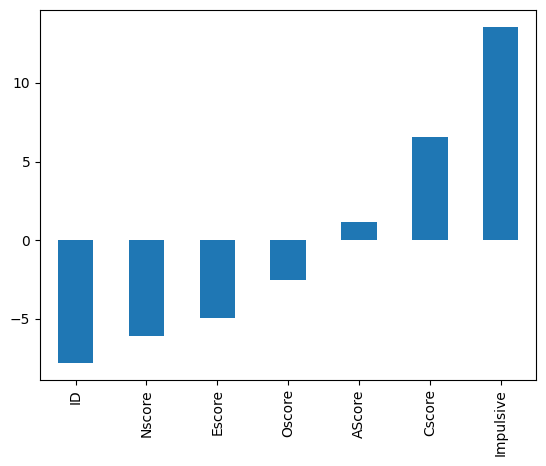

In [77]:
features = pd.DataFrame(feature_dict, index=[0])
features.T.plot.bar(legend = False)